# Exercise 9-1: Analyze time-series data

## Read the data

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
stockData = pd.read_pickle('stocks.pkl')
stockData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    253 non-null    datetime64[ns]
 1   Open    253 non-null    float64       
 2   High    253 non-null    float64       
 3   Low     253 non-null    float64       
 4   Close   253 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 10.0 KB


In [3]:
stockData.head()

,Date,Open,High,Low,Close
0,2020-01-02,74.059998,75.150002,73.797501,75.087502
1,2020-01-03,74.287498,75.144997,74.125000,74.357498
2,2020-01-06,73.447502,74.989998,73.187500,74.949997
3,2020-01-07,74.959999,75.224998,74.370003,74.597504
4,2020-01-08,74.290001,76.110001,74.290001,75.797501


## Generate date ranges

In [4]:
# generate a daterange for every other day in the year 2020
pd.date_range('01/01/2020','12/31/2020', freq='2D')

DatetimeIndex(['2020-01-01', '2020-01-03', '2020-01-05', '2020-01-07',
               '2020-01-09', '2020-01-11', '2020-01-13', '2020-01-15',
               '2020-01-17', '2020-01-19',
               ...
               '2020-12-12', '2020-12-14', '2020-12-16', '2020-12-18',
               '2020-12-20', '2020-12-22', '2020-12-24', '2020-12-26',
               '2020-12-28', '2020-12-30'],
              dtype='datetime64[ns]', length=183, freq='2D')

In [5]:
# generate a daterange for every 3 hours in 2020
pd.date_range('01/01/2020','12/31/2020', freq='3h')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 03:00:00',
               '2020-01-01 06:00:00', '2020-01-01 09:00:00',
               '2020-01-01 12:00:00', '2020-01-01 15:00:00',
               '2020-01-01 18:00:00', '2020-01-01 21:00:00',
               '2020-01-02 00:00:00', '2020-01-02 03:00:00',
               ...
               '2020-12-29 21:00:00', '2020-12-30 00:00:00',
               '2020-12-30 03:00:00', '2020-12-30 06:00:00',
               '2020-12-30 09:00:00', '2020-12-30 12:00:00',
               '2020-12-30 15:00:00', '2020-12-30 18:00:00',
               '2020-12-30 21:00:00', '2020-12-31 00:00:00'],
              dtype='datetime64[ns]', length=2921, freq='3h')

In [6]:
# generate a date range for every other Friday in 2020
pd.date_range('01/01/2020','12/31/2020', freq='2W-FRI')

DatetimeIndex(['2020-01-03', '2020-01-17', '2020-01-31', '2020-02-14',
               '2020-02-28', '2020-03-13', '2020-03-27', '2020-04-10',
               '2020-04-24', '2020-05-08', '2020-05-22', '2020-06-05',
               '2020-06-19', '2020-07-03', '2020-07-17', '2020-07-31',
               '2020-08-14', '2020-08-28', '2020-09-11', '2020-09-25',
               '2020-10-09', '2020-10-23', '2020-11-06', '2020-11-20',
               '2020-12-04', '2020-12-18'],
              dtype='datetime64[ns]', freq='2W-FRI')

## Reindex the data

In [7]:
stockData = stockData.set_index('Date')
stockData.head()

,Open,High,Low,Close
Date,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502
2020-01-03,74.287498,75.144997,74.125000,74.357498
2020-01-06,73.447502,74.989998,73.187500,74.949997
2020-01-07,74.959999,75.224998,74.370003,74.597504
2020-01-08,74.290001,76.110001,74.290001,75.797501


In [8]:
# reindex the data so the data contains only Fridays
stockDataFridays = stockData.reindex(pd.date_range('01/01/2020','12/31/2020', freq='W-FRI'))
stockDataFridays.head()

,Open,High,Low,Close
2020-01-03,74.287498,75.144997,74.125000,74.357498
2020-01-10,77.650002,78.167503,77.062500,77.582497
2020-01-17,79.067497,79.684998,78.750000,79.682503
2020-01-24,80.062500,80.832497,79.379997,79.577499
2020-01-31,80.232498,80.669998,77.072502,77.377502


<Axes: >

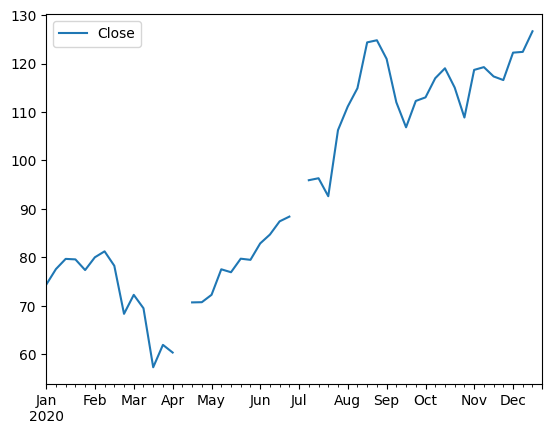

In [9]:
stockDataFridays.plot(y='Close')

## Resample the data

In [10]:
stockDataDown = stockData.resample(rule='ME').mean()

<Axes: xlabel='Date'>

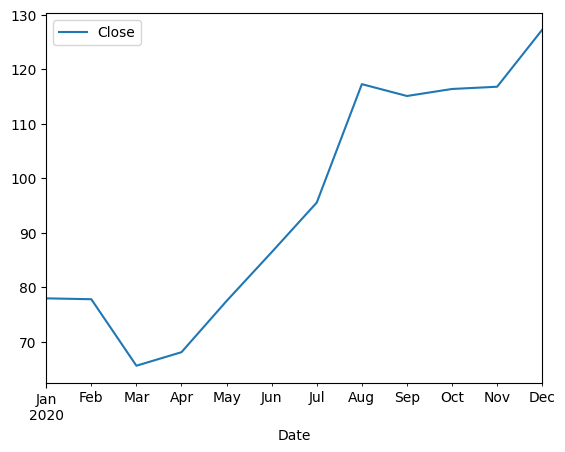

In [11]:
stockDataDown.plot(y='Close')

## Compute a rolling window

In [12]:
# compute a 2 week rolling window
stocksRolling = stockData[['Close']].rolling(window=14, min_periods=1).mean()
stocksRolling.head()

,Close
Date,
2020-01-02,75.087502
2020-01-03,74.722500
2020-01-06,74.798332
2020-01-07,74.748125
2020-01-08,74.958000


<Axes: xlabel='Date'>

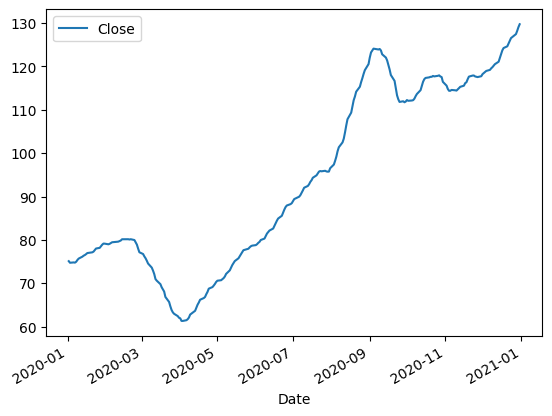

In [13]:
stocksRolling.plot()